# How to use R

---

## Dataset

"iris", "airquality"はデフォルトで入っている例題用のデータセット

In [ ]:
head(iris) #head()で上から6番目まで表示

In [17]:
head(airquality)

Ozone,Solar.R,Wind,Temp,Month,Day,date
41,190,7.4,67,5,1,1973-05-01
36,118,8.0,72,5,2,1973-05-02
12,149,12.6,74,5,3,1973-05-03
18,313,11.5,62,5,4,1973-05-04
NA,NA,14.3,56,5,5,1973-05-05
28,NA,14.9,66,5,6,1973-05-06


## Data Type

追記する

## Distribution and Calculation involved in Distribution

1. 正規分布

- 正規分布に従う乱数生成

`rnorm(n=_number_of_samples_, mean=_mean_, sd=_standard_deviation_)`

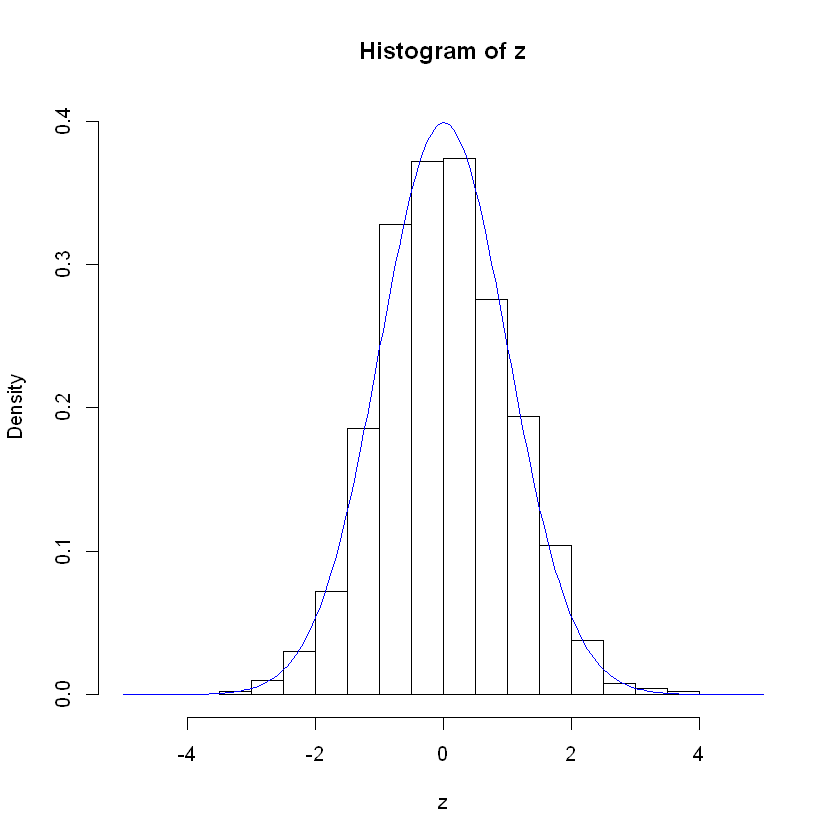

In [26]:
z <- rnorm(n=1000, mean=0, sd=1)

hist(z, xlim=c(-5, 5), freq=F, ylim=c(0, 0.4))
x <- seq(-5, 5, 0.05)
lines(x, dnorm(x, mean=0, sd=1), type="l", col="blue")

- 正規分布における値に対する確率密度関数の値

`dnorm(_value_ (/, mean=_mean_)(/, sd=_standard_deviation_))`

In [28]:
dnorm(0)

[1] 0.3989423

- 正規分布における下側/上側確率

下側確率: `pnorm(_value_, mean=_mean_, sd=_standard_deviation_)`  
上側確率: `pnorm(_value_, mean=_mean_, sd=_standard_deviation_, lower.tail=F)`

In [31]:
lower = pnorm(-1, mean=0, sd=1) #-∞ < x < -1の累積確率(1より左のの下側確率)
upper = pnorm(1, mean=0, sd=1, lower.tail=F) #1 < x < ∞の累積確率(1より右の上側確率)
1 - lower - upper #1シグマ以内にそのデータが存在している確率

[1] 0.6826895

- 正規分布において累積確率(面積)を与えて、下側確率がその累積確率に一致する値を求める

`qnorm(_value_)`

In [34]:
qnorm(0.999)
qnorm(0.5)

[1] 3.090232

[1] 0

## Function

- `subset(_dataframe_, _constraints_)`    
explanation:データフレームから条件を用いてその一部を抽出する

In [3]:
setosa <- subset(iris, iris$Species=="setosa")
versicolor <- subset(iris, iris$Species=="versicolor")
virginica <- subset(iris, iris$Species=="virginica")

## Figure

- 散布図

`plot(_data_x_~_data_y_, data=_dataframe_, pch=_number_, col=_color_name_)`

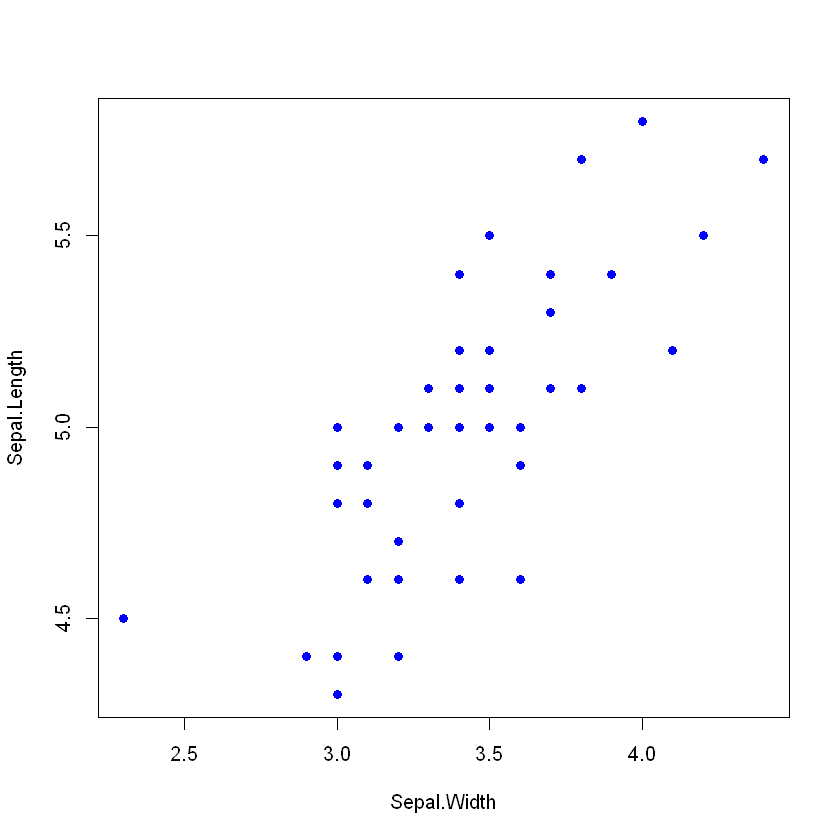

In [18]:
plot(Sepal.Length~Sepal.Width, data=setosa, pch=16, col="blue") #_dataframe_.attribute1~_dataframe_.attribute2でx,yを同時に指定できる

pchについては以下のように現状では25個用意されている

Warning message in plot.xy(xy, type, ...):
" pch の値 '26' は未実装です "
Warning message in plot.xy(xy, type, ...):
" pch の値 '27' は未実装です "
Warning message in plot.xy(xy, type, ...):
" pch の値 '28' は未実装です "
Warning message in plot.xy(xy, type, ...):
" pch の値 '29' は未実装です "
Warning message in plot.xy(xy, type, ...):
" pch の値 '30' は未実装です "


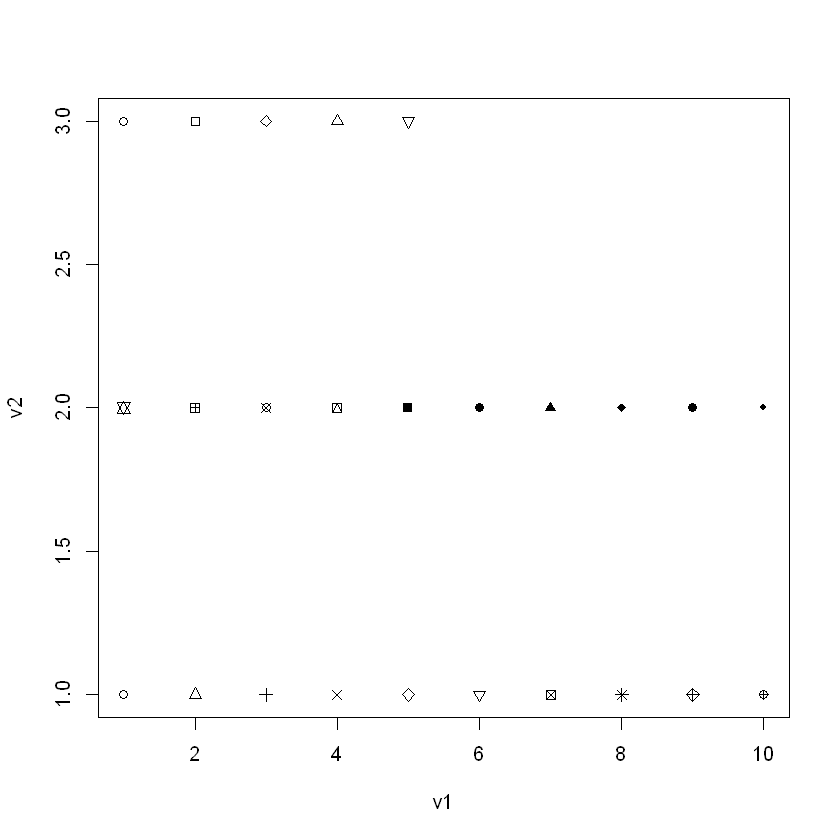

In [13]:
v1 <- rep(1:10, 3)
v2 <- rep(1:3, each=10)
plot(v1, v2, pch=1:30)

- 折れ線グラフ

`plot(_data_y_~_data_x_, data=_dataframe_, pch=_number_, type=_type_)`  
type=“l”:線で連結  
type=“b”:点を表示し、線で連結  
type=“o”:点を表示し、線を重ねる  
（デフォルトは点のみ）

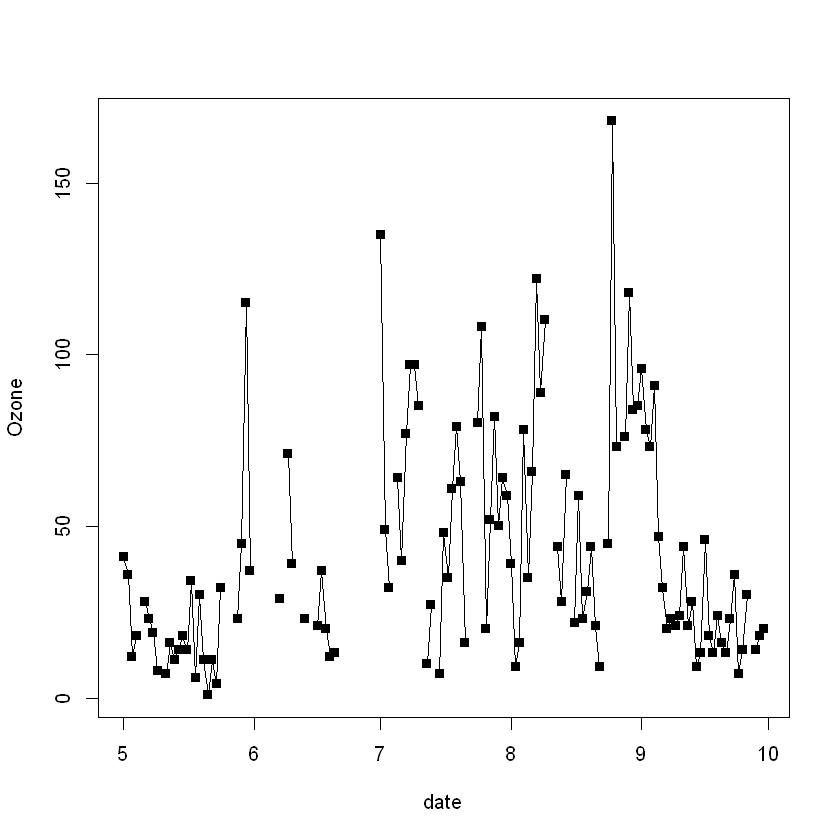

In [19]:
#Rの例題データairqualityからオゾン量の変化をプロット（1973年5月1日～9月30日）
airquality$date <- with(airquality, as.Date(paste("1973", Month, Day, sep="-")))
plot(Ozone~date, data=airquality, pch=15, type="o")

- 箱ひげ図

`boxplot(_data1_, _data2_, _data3_, names=c(_name1_, _name2_, _name3_), main=_Figure_Title_, xlab=_X_label_name_, ylab=_Y_label_name_)`  
最大値:Q1 + 1.5xIQR  
最小値:Q1 - 1.5xIQR  
Q1:第一四分位点  
Q2:中央値  
Q3:第三四分位点  
IQR:四分位範囲(Q3 - Q1)

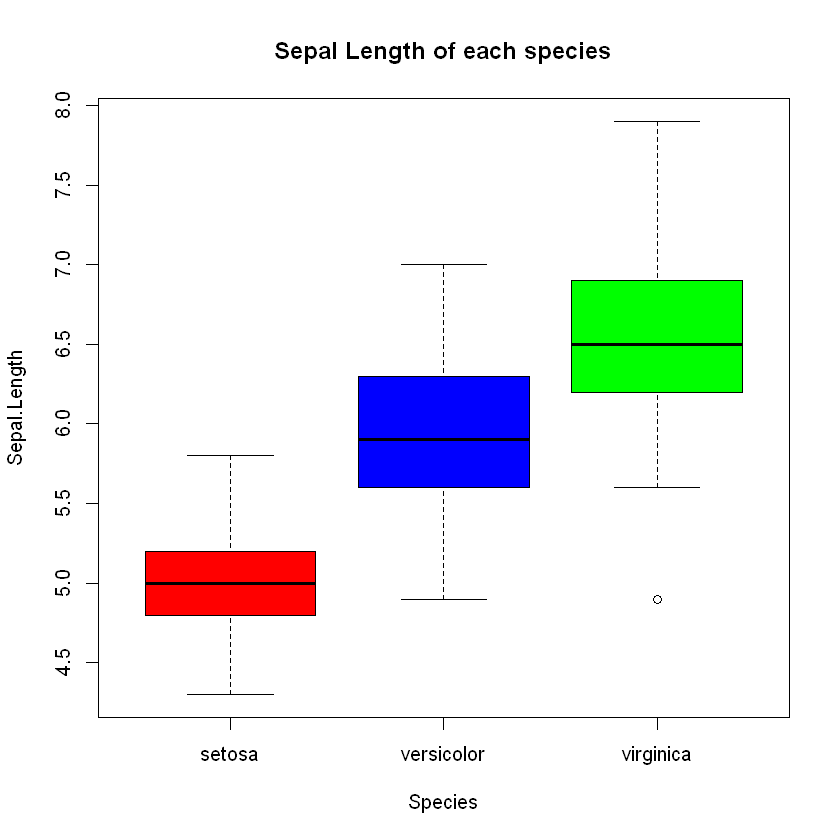

In [4]:
boxplot(setosa$Sepal.Length, versicolor$Sepal.Length, virginica$Sepal.Length, names=c("setosa", "versicolor", "virginica"), main="Sepal Length of each species",
        xlab="Species", ylab="Sepal.Length", col=c("red", "blue", "green"))

丸は外れ値

- ヒストグラム

`hist(_data_)`

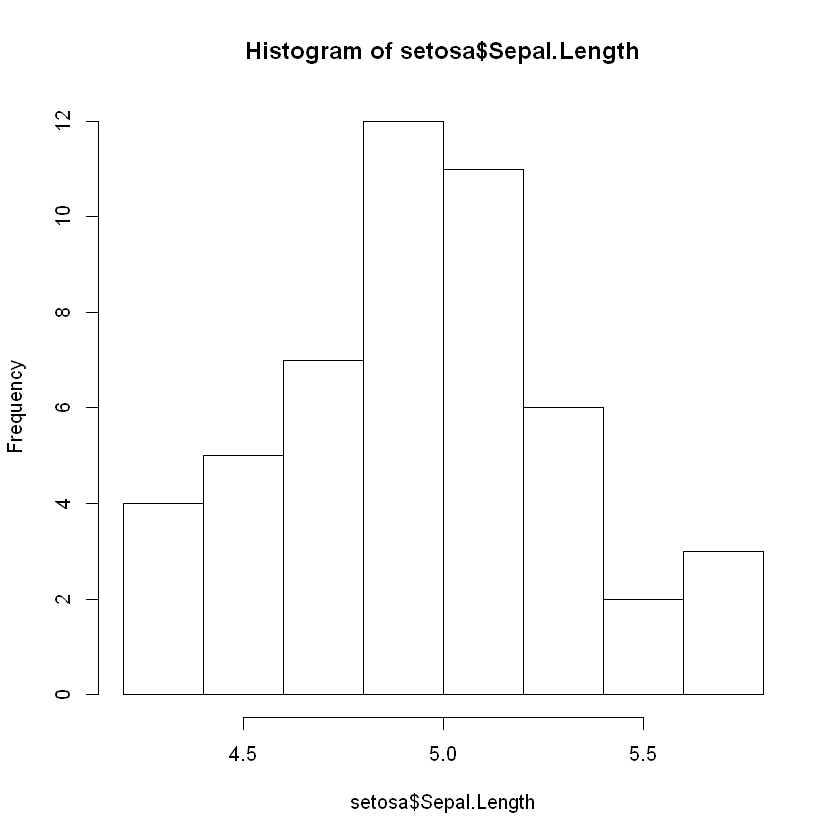

In [10]:
hist(setosa$Sepal.Length)

階級幅はしていなければ自動設定される

# Reference

> [Rによる統計入門](https://htsuda.net/stats/dataset.html)